In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def imshow(image,conversion=cv2.COLOR_BGR2RGB,cmap='None'):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image,conversion),cmap=cmap)

In this notebook we will be working on
- Converting images to grayscale
- Performing edge detection
- Thresholding a grayscale image
- Finding, counting and drawing contours
- Conducting erosion and dilation
- Masking an image

#### Working on tetris image

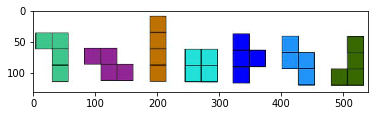

In [3]:
file = 'tetris.jpg'
image = cv2.imread(file)
plt.imshow(image) #BGR image

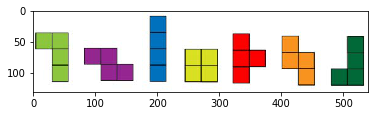

In [6]:
#original image
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

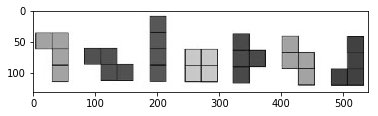

In [7]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

# without notebook it is just cv2.imshow("",gray); cv2.waitKey(0);cv2.destoryAllWindows() 

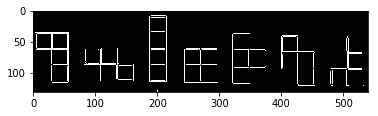

In [9]:
edge = cv2.Canny(gray,27,100)
plt.imshow(edge,cmap='gray')

In [11]:
cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

(225.0, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

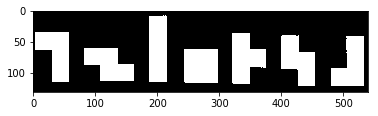

In [12]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh,cmap='gray')

In [13]:
cv2.__version__ ##contours = cnts[1]

'3.4.1'

In [15]:
#image, contours, hierarchy

cnts_mat = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
len(cnts_mat) #as version is 3.4.3, returns image, contours, hiaerarchy

3

In [16]:
cnts = cnts_mat[1]

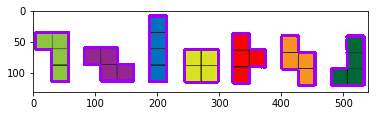

In [19]:
output = image.copy()
for c in cnts:
    cv2.drawContours(output,[c],-1,(240,0,159),3)
    plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

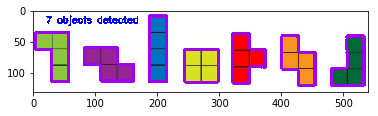

In [20]:
text = '{} objects detected'.format(len(cnts))
cv2.putText(output, text, (20,20), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,0), 2)
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

#### Successfuly able to find and count objects in the image

### 

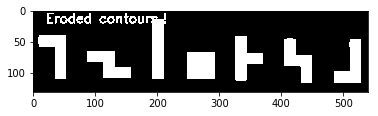

In [21]:
#erosion
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5) #kernel is None
cv2.putText(mask, 'Eroded contours.!', (20,20), cv2.FONT_HERSHEY_SIMPLEX, .7, (255,0,0), 2)
plt.imshow(mask,cmap='gray')

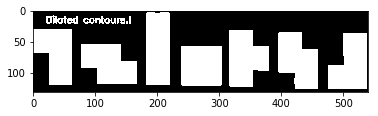

In [22]:
#Dilated
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5) #kernel is None
cv2.putText(mask, 'Dilated contours.!', (20,20), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,0), 2)
plt.imshow(mask,cmap='gray')

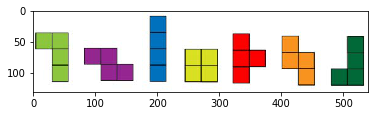

In [24]:
#masking with thresholded img
thresh_mask = thresh.copy()
output = cv2.bitwise_and(image,image,mask=thresh_mask)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

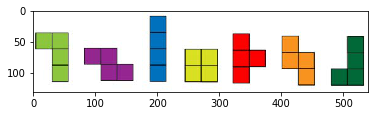

In [26]:
## Trying out bitwise not operator
thresh_m = thresh.copy()
output = cv2.bitwise_not(image,image,mask=thresh_m)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))